In [1]:
import matplotlib.pyplot as plt
import torch
from sklearn.datasets import load_digits
from torch import nn, optim

In [5]:
"""
多クラスのロジスティック回帰
"""

torch.manual_seed(0)
digits = load_digits()

X = torch.tensor(digits.data, dtype=torch.float32)
y = torch.tensor(digits.target, dtype=torch.int64)  # CrossEntropyLossはtorch.int64を受け取る

# サイズ確認
print(f'X size: {X.size()}')
print(f'y size: {y.size()}')

# model
net = nn.Linear(in_features=64, out_features=10)
criterion = nn.CrossEntropyLoss()  # 勝手にSoftmaxしてくれるので若干罠
optimizer = optim.SGD((net.parameters()), lr=0.01)

X size: torch.Size([1797, 64])
y size: torch.Size([1797])


In [6]:
# 学習
num_epochs = 100
loss_list = []

for epoch in range(1, num_epochs + 1):
    optimizer.zero_grad()
    
    y_pred = net(X)
    
    loss = criterion(y_pred, y)
    
    #勾配計算
    loss.backward()
    
    loss_list.append(loss.item())
    
    optimizer.step()

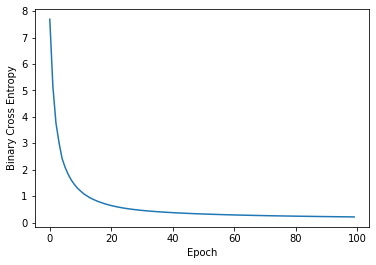

In [7]:
# 損失の可視化
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Binary Cross Entropy')
plt.show()

In [8]:
# 予測確率の確認
output = net(X)
print(output.size())

# 予測ラベルの計算
# torch.max()は最大値以外と、位置も計算するよ
_, labels_pred = torch.max(output, dim=1)
print(labels_pred)

# 正答数
correct_num = (y == labels_pred).sum().item()
print(f'Correct: {correct_num}({(correct_num / len(y)):.3f})')

torch.Size([1797, 10])
tensor([0, 1, 2,  ..., 8, 9, 8])
Correct: 1699(0.945)
